
Note: the first part of this file is largely based on [A quick tour of GA](https://luca-scr.github.io/GA/articles/GA.html) by Luca Scrucca.

# Introduction

Genetic algorithms (GAs) are stochastic search algorithms inspired by the basic principles of biological evolution, genetics and natural selection. GAs simulate the evolution of living organisms --where the fittest individuals (tend to) dominate over the weaker ones-- by mimicking the biological mechanisms of evolution, such as selection, crossover and mutation.

The R package **GA** provides a collection of general purpose functions for optimization using genetic algorithms. The package includes a flexible set of tools for implementing genetic algorithms search in both the continuous and discrete case, whether constrained or not. Users can easily define their own objective function depending on the problem at hand. Several genetic operators are available and can be combined to explore the best settings for the current task. Furthermore, users can define new genetic operators and easily evaluate their performance. Local search using general-purpose optimisation algorithms can be applied stochastically to exploit interesting regions, leading to hybrid schemes; this idea was originally named Lamarckianism. GAs can be run sequentially or in parallel, using an explicit master-slave parallelisation or a coarse-grain islands approach.

This document gives a quick tour of **GA** (version `r packageVersion("GA")`) functionalities. It was written in R Markdown, using the [knitr](https://cran.r-project.org/package=knitr) package for production. Specifically, the [R book page](https://r4ds.had.co.nz/r-markdown.html) provides very good information for other output formats.

Further details about the **GA** package are provided in the papers Scrucca (2013) and Scrucca (2017). See also `help(package="GA")` for a list of available functions and methods. 

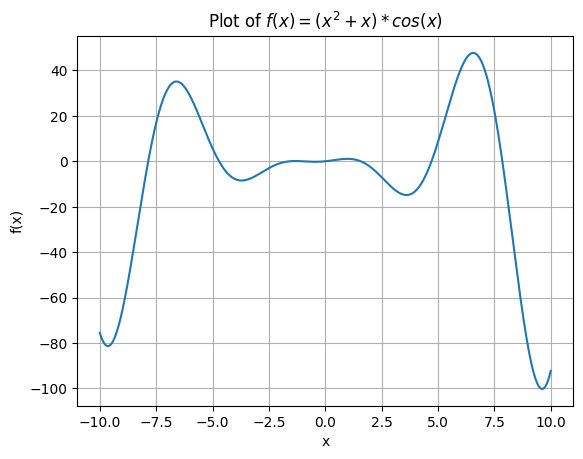

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**2 + x) * np.cos(x)

lbound, ubound = -10, 10
x_values = np.linspace(lbound, ubound, 1000)
y_values = f(x_values)

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of $f(x) = (x^2 + x) * cos(x)$')
plt.grid(True)
plt.show()

In [185]:
import pygad
def f(x):
    return (x**2 + x) * np.cos(x)

def fitness_func(ga_instance, solution, solution_idx):
    output = (solution**2 + solution) * np.cos(solution)
    return output

fitness_function = fitness_func
init_range_low = -10
init_range_high = 10
gene_type = float

ga_instance = pygad.GA(fitness_func=fitness_function,
                    #    init_range_low=init_range_low,
                    #    init_range_high=init_range_high,
                       num_genes=50,
                       sol_per_pop=10,
                       num_generations=100,
                       num_parents_mating=2,
                       gene_type=gene_type,
                       gene_space={'low': -10, 'high': 10},
                       mutation_probability=0.1,
                       keep_elitism=2,
                       crossover_probability=0.8,
                       save_best_solutions=True,)

ga_instance.run()

c:\Users\alber\Documents\GitHub\UPC_MasterArtificialIntelligence\.venv\lib\site-packages\pygad\pygad.py:1151: UserWarning: Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.
  warnings.warn("Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.")


In [192]:
for i, solution in enumerate(ga_instance.best_solutions):
    print("Evaluation of the best solution: {solution}".format(solution=np.median(f(solution))))

Evaluation of the best solution: -1.1689236971910448
Evaluation of the best solution: -3.225031686130216
Evaluation of the best solution: -2.6937795911521403
Evaluation of the best solution: -0.11877311781158406
Evaluation of the best solution: -0.09214068464844831
Evaluation of the best solution: -2.515217636338625
Evaluation of the best solution: -0.22140922447691413
Evaluation of the best solution: -0.17314837819141302
Evaluation of the best solution: -0.22140922447691413
Evaluation of the best solution: -0.22140922447691413
Evaluation of the best solution: -0.22140922447691413
Evaluation of the best solution: -0.17314837819141302
Evaluation of the best solution: -0.17314837819141302
Evaluation of the best solution: -2.95844762543573
Evaluation of the best solution: -0.22140922447691413
Evaluation of the best solution: -0.17314837819141302
Evaluation of the best solution: -0.22140922447691413
Evaluation of the best solution: -0.22140922447691413
Evaluation of the best solution: -0.2

In [188]:
ga_instance.plot_result()

AttributeError: 'GA' object has no attribute 'plot_result'

In [187]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
solution_fitness

'numpy.ndarray' object has no attribute 'index'
Traceback (most recent call last):
  File "c:\Users\alber\Documents\GitHub\UPC_MasterArtificialIntelligence\.venv\lib\site-packages\pygad\pygad.py", line 1663, in cal_pop_fitness
    solution_idx = self.best_solutions.index(list(sol))
AttributeError: 'numpy.ndarray' object has no attribute 'index'


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [180]:
solution_idx

9

In [159]:
np.max(f(solution))

47.43020649955599

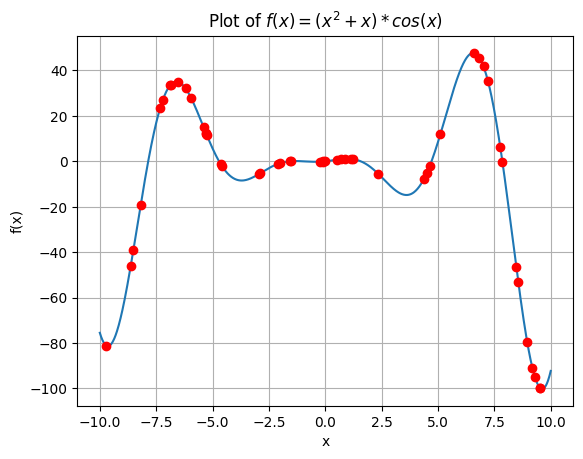

In [184]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
# print("Point of the best solution : {solution}".format(solution=solution))
x_sol = np.argmax(f(solution))
# sol = np.max(f(solution[x_sol]))

plt.plot(x_values, y_values)
plt.plot(solution, solution_fitness, 'ro')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of $f(x) = (x^2 + x) * cos(x)$')
plt.grid(True)
plt.show()

In [165]:
ga_instance.plot_genes(solutions=[solution])

The solutions parameter must be a string but <class 'list'> found.


RuntimeError: The solutions parameter must be a string but <class 'list'> found.

In [63]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Point of the best solution : {solution}".format(solution=solution))
# print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

# min_prediction = np.min(f(solution))
# max_prediction = np.max(f(solution))
# print("Predicted output based on the minimum solution : {prediction}".format(prediction=min_prediction))
# print("Predicted output based on the maximum solution : {prediction}".format(prediction=max_prediction))

Point of the best solution : [ 6.27683353 -0.91769408 -0.37947944  0.81481087 -3.63142518 -3.84551296
 -5.73678617  7.2015882   1.3374047  -5.91933344 -6.73834932 -4.04376101
  7.82607881  9.01282406 -9.14344633  4.25140834  8.65900961  6.97618289
 -1.25378849  4.46896419 -9.13159717  0.11797562 -2.52392252 -8.53666062
  2.60493004 -0.34873704 -7.17450165 -4.19737335 -5.54975373  3.93839631
 -0.60802966  2.54211126 -0.4957548  -1.38998763 -0.6528535   3.78251124
 -4.45734434 -7.75824619  2.14081498  6.85054857 -7.23590065 -4.56543156
  8.97429273 -9.5160819   7.60220397 -9.89745628  1.02824736  6.3405494
  0.72181071  6.68299828]
